## To replicate the sentiment analysis with data from twitter:
### A. Start a notebook instance in machine Learning Lab 
### B. Open the example link and download the source code from Github repository.
### C. Sign up for <a href="https://developer.twitter.com/en/support/twitter-api/developer-account">a developer account in Twitter</a>
### D. Copy, paste and modify the python code file in the notebook

In [24]:
# Install Libraries
!pip install textblob
!pip install tweepy
!pip install pycountry
!pip install wordcloud
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com


In [2]:
# Import Libraries

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/ec2-user/nltk_data...


True

# Step 2: Authentication for Twitter API

In [23]:
# Authentication
consumer_key = "OLgewSdbgUqEYCzPnix1JyKRZ"
consumer_secret = "nY83VZEsh3J8zMmG7zwy9qC6jUgWDHwBU3qFKZvzzKTtm7wyat"
access_token = "1654000991941828608-HhNhJDOXtD32id3AmUN7zB7jWkal2F"
access_token_secret = "HGFDYM64pHFrfXcCJLHyVZhGgeFQGtbWJy6gIK8gu9K5f"

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

# Step 3: Getting Tweets With Keyword or Hashtag

In [6]:
#Sentiment Analysis
def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))

tweets = tweepy.Cursor(api.search_tweets, q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    # print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')
 


Please enter keyword or hashtag to search:  UCM
Please enter how many tweets to analyze:  100


In [7]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  100
positive number:  25
negative number:  11
neutral number:  64


In [8]:
tweet_list[0:20]

,0
0,RT @JcsMadrid_: ¿Te perdiste la participación ...
1,RT @peterjordan100: Geral falando bem de Guard...
2,RT @guilleuu1: Abro hilo: 🦠7 MITOS SOBRE EL VP...
3,RT @MarvelLatin: Top 5 VILLANOS del UCM https:...
4,RT @MarvelLatin: Top 5 VILLANOS del UCM https:...
5,RT @Onor: @peterjordan100 Melhor trilogia do U...
6,RT @MarvelLatin: Top 5 VILLANOS del UCM https:...
7,"RT @Multiverso_GK: Y así cierra, una de las me..."
8,RT @peterjordan100: Geral falando bem de Guard...
9,@JhonAlexCortes7 @ADrouilly @brucebatman007 To...


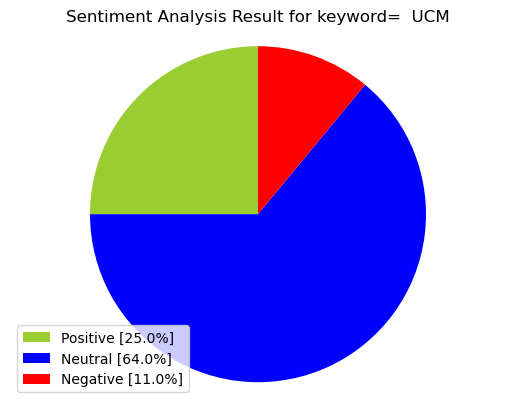

In [9]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [10]:
tweet_list.drop_duplicates(inplace = True)

# Extracting text values

In [11]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,RT @JcsMadrid_: ¿Te perdiste la participación ...,RT @JcsMadrid_: ¿Te perdiste la participación ...
1,RT @peterjordan100: Geral falando bem de Guard...,RT @peterjordan100: Geral falando bem de Guard...
2,RT @guilleuu1: Abro hilo: 🦠7 MITOS SOBRE EL VP...,RT @guilleuu1: Abro hilo: 🦠7 MITOS SOBRE EL VP...
3,RT @MarvelLatin: Top 5 VILLANOS del UCM https:...,RT @MarvelLatin: Top 5 VILLANOS del UCM https:...
5,RT @Onor: @peterjordan100 Melhor trilogia do U...,RT @Onor: @peterjordan100 Melhor trilogia do U...
7,"RT @Multiverso_GK: Y así cierra, una de las me...","RT @Multiverso_GK: Y así cierra, una de las me..."
9,@JhonAlexCortes7 @ADrouilly @brucebatman007 To...,@JhonAlexCortes7 @ADrouilly @brucebatman007 To...
14,"RT @MarvelDato: 🍿 | ¿Del 1 al 10, qué notan le...","RT @MarvelDato: 🍿 | ¿Del 1 al 10, qué notan le..."
15,Mi superhéroe favorito de toda la vida es Spid...,Mi superhéroe favorito de toda la vida es Spid...
17,RT @prof_luighi: Si hoy tuviera que hacer otra...,RT @prof_luighi: Si hoy tuviera que hacer otra...


In [12]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,RT @JcsMadrid_: ¿Te perdiste la participación ...,te perdiste la participaci n de en el deba...
1,RT @peterjordan100: Geral falando bem de Guard...,geral falando bem de guardi es da gal xia ge...
2,RT @guilleuu1: Abro hilo: 🦠7 MITOS SOBRE EL VP...,abro hilo 7 mitos sobre el vph xii concurs...
3,RT @MarvelLatin: Top 5 VILLANOS del UCM https:...,top 5 villanos del ucm
5,RT @Onor: @peterjordan100 Melhor trilogia do U...,melhor trilogia do ucm fala s rio
7,"RT @Multiverso_GK: Y así cierra, una de las me...",y as cierra una de las mejores trilog as de...
9,@JhonAlexCortes7 @ADrouilly @brucebatman007 To...,todas las cr ticas que vi a krasknski so...
14,"RT @MarvelDato: 🍿 | ¿Del 1 al 10, qué notan le...",del 1 al 10 qu notan le ponen a guard...
15,Mi superhéroe favorito de toda la vida es Spid...,mi superh roe favorito de toda la vida es spid...
17,RT @prof_luighi: Si hoy tuviera que hacer otra...,si hoy tuviera que hacer otra vez un m ster m...


In [13]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

/tmp/ipykernel_6818/4219357815.py:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, row in tw_list['text'].iteritems():


,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @JcsMadrid_: ¿Te perdiste la participación ...,te perdiste la participaci n de en el deba...,0.0,0.0,neutral,0.000,1.000,0.000,0.0000
1,RT @peterjordan100: Geral falando bem de Guard...,geral falando bem de guardi es da gal xia ge...,0.0,0.0,neutral,0.000,1.000,0.000,0.0000
2,RT @guilleuu1: Abro hilo: 🦠7 MITOS SOBRE EL VP...,abro hilo 7 mitos sobre el vph xii concurs...,0.0,0.0,neutral,0.000,1.000,0.000,0.0000
3,RT @MarvelLatin: Top 5 VILLANOS del UCM https:...,top 5 villanos del ucm,0.5,0.5,positive,0.000,0.625,0.375,0.2023
5,RT @Onor: @peterjordan100 Melhor trilogia do U...,melhor trilogia do ucm fala s rio,0.0,0.0,neutral,0.000,1.000,0.000,0.0000
7,"RT @Multiverso_GK: Y así cierra, una de las me...",y as cierra una de las mejores trilog as de...,0.0,0.0,neutral,0.000,1.000,0.000,0.0000
9,@JhonAlexCortes7 @ADrouilly @brucebatman007 To...,todas las cr ticas que vi a krasknski so...,0.0,0.0,neutral,0.000,1.000,0.000,0.0000
14,"RT @MarvelDato: 🍿 | ¿Del 1 al 10, qué notan le...",del 1 al 10 qu notan le ponen a guard...,0.0,0.0,neutral,0.000,1.000,0.000,0.0000
15,Mi superhéroe favorito de toda la vida es Spid...,mi superh roe favorito de toda la vida es spid...,0.0,0.0,negative,0.087,0.913,0.000,-0.2960
17,RT @prof_luighi: Si hoy tuviera que hacer otra...,si hoy tuviera que hacer otra vez un m ster m...,0.0,0.0,neutral,0.000,1.000,0.000,0.0000


In [14]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [15]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [16]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,19,52.78
negative,11,30.56
positive,6,16.67


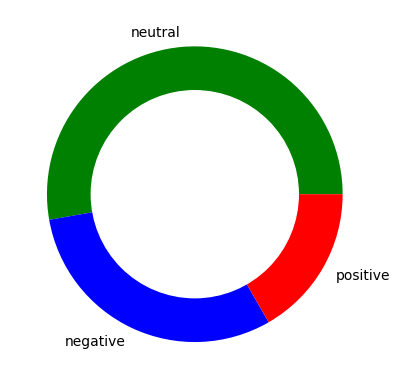

In [17]:
# create data for Pie Chart
pc = count_values_in_column(tw_list,"sentiment")
names= pc.index
size=pc["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [18]:
#Function to Create Wordcloud

def create_wordcloud(text):
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white", width=600, height=400,               
                  max_words=300,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    
    plt.imshow(wc)
    plt.show()



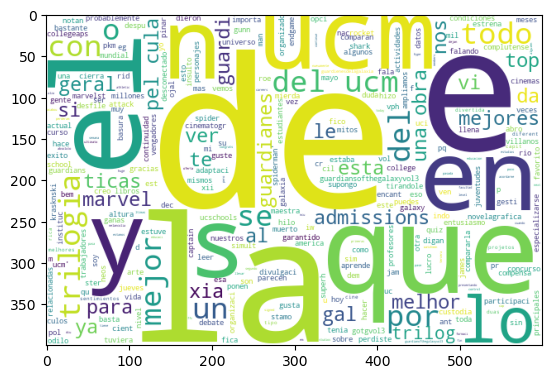

In [19]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

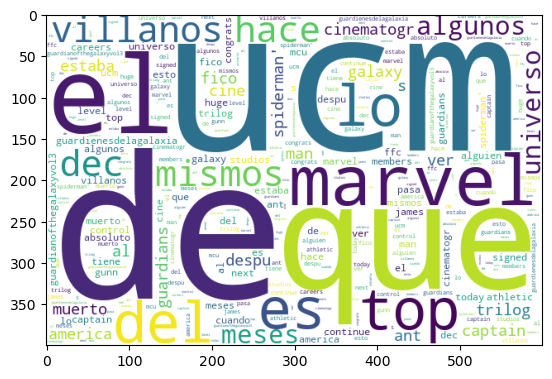

In [20]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

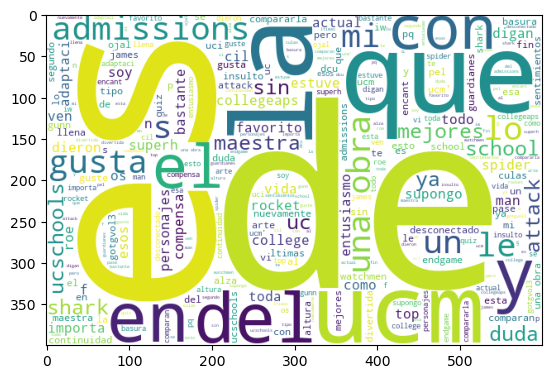

In [21]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

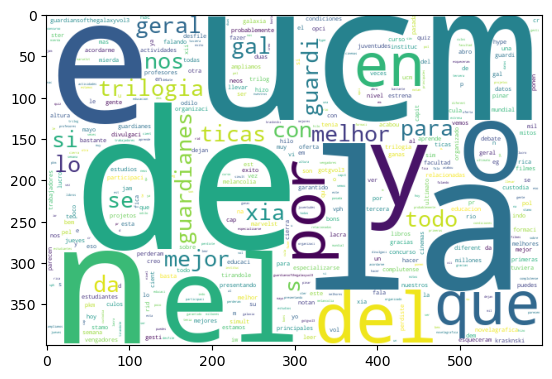

In [22]:
#Creating wordcloud for neutral sentiment
create_wordcloud(tw_list_neutral["text"].values)